In [68]:
import cv2
import numpy as np

In [130]:
first = cv2.imread('./first.jpg')
# first = cv2.resize(first, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
first = cv2.resize(first, dsize=(700, 600))

# average, gaussian, smooth
first_blur = cv2.blur(first, (3,3))
first_gaussian = cv2.GaussianBlur(first, (3,3), 1.5)
smooth_filter = np.array([[1/16, 2/16, 1/16], \
                          [2/16, 4/16, 2/16], \
                          [1/16, 2/16, 1/16]])
first_smooth = cv2.filter2D(first, -1, smooth_filter)

cv2.imshow('first', first)
cv2.imshow('first_blur', first_blur)
cv2.imshow('first_gaussian', first_gaussian)
cv2.imshow('first_smooth', first_smooth)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [129]:
second = cv2.imread('./second.jpg')
# first = cv2.resize(first, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
second = cv2.resize(second, dsize=(700, 600))

# average, gaussian, smooth
second_blur = cv2.blur(second, (3,3))
second_gaussian = cv2.GaussianBlur(second, (3,3), 1.5)
smooth_filter = np.array([[1/16, 2/16, 1/16], \
                          [2/16, 4/16, 2/16], \
                          [1/16, 2/16, 1/16]])
second_smooth = cv2.filter2D(second, -1, smooth_filter)

cv2.imshow('second', second)
cv2.imshow('second_blur', second_blur)
cv2.imshow('second_gaussian', second_gaussian)
cv2.imshow('second_smooth', second_smooth)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 외곽선 검출
##### https://house-of-e.tistory.com/entry/2-Opencv-image-%EA%B2%B0%ED%95%A9-%EC%99%B8%EA%B3%BD%EC%84%A0-%EA%B2%80%EC%B6%9C

In [127]:
image = cv2.imread('second.jpg', cv2.IMREAD_COLOR)
image = cv2.resize(image, dsize=(700, 600))
image2 = image.copy()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

return_value, threshold_image = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(threshold_image, 
                        cv2.RETR_LIST, 
                        cv2.CHAIN_APPROX_NONE)

for contour in contours:
    cv2.drawContours(image,contour,-1,(0,0,255),2)
    
threshold_image = np.stack((threshold_image,)*3, axis=-1)
# image = np.concatenate((image,threshold_image), axis=1)
# image = np.concatenate((image,image2), axis=1)

cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## OpenCV를 이용해 두개의 이미지 비교(SSIM)
##### https://walkaroundthedevelop.tistory.com/56

In [72]:
from skimage.metrics import structural_similarity as ssim 
import argparse
import imutils
import cv2
from skimage import io

# 2. Construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-c", "--count", required=True, help="Directory of the image that will be compared")
ap.add_argument("-v", "--verbose", required=True, help="Directory of the image that will be used to compare")
args = vars(ap.parse_args())

# 3. Load the two input images
imageA = cv2.imread('./first.jpg')
imageB = cv2.imread('./second.jpg')

# 4. Convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# 5. Compute the Structural Similarity Index (SSIM) between the two
#    images, ensuring that the difference image is returned
(score, diff) = ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")

# diff가 어떻게 되는지 볼 수 있습니다.
cv2.imshow('diff',diff)
cv2.waitKey(0)

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

usage: ipykernel_launcher.py [-h] -c COUNT -v VERBOSE
ipykernel_launcher.py: error: the following arguments are required: -c/--count, -v/--verbose


SystemExit: 2

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## OpenCV를 이용한 Feature Matching
##### https://hongku.tistory.com/333

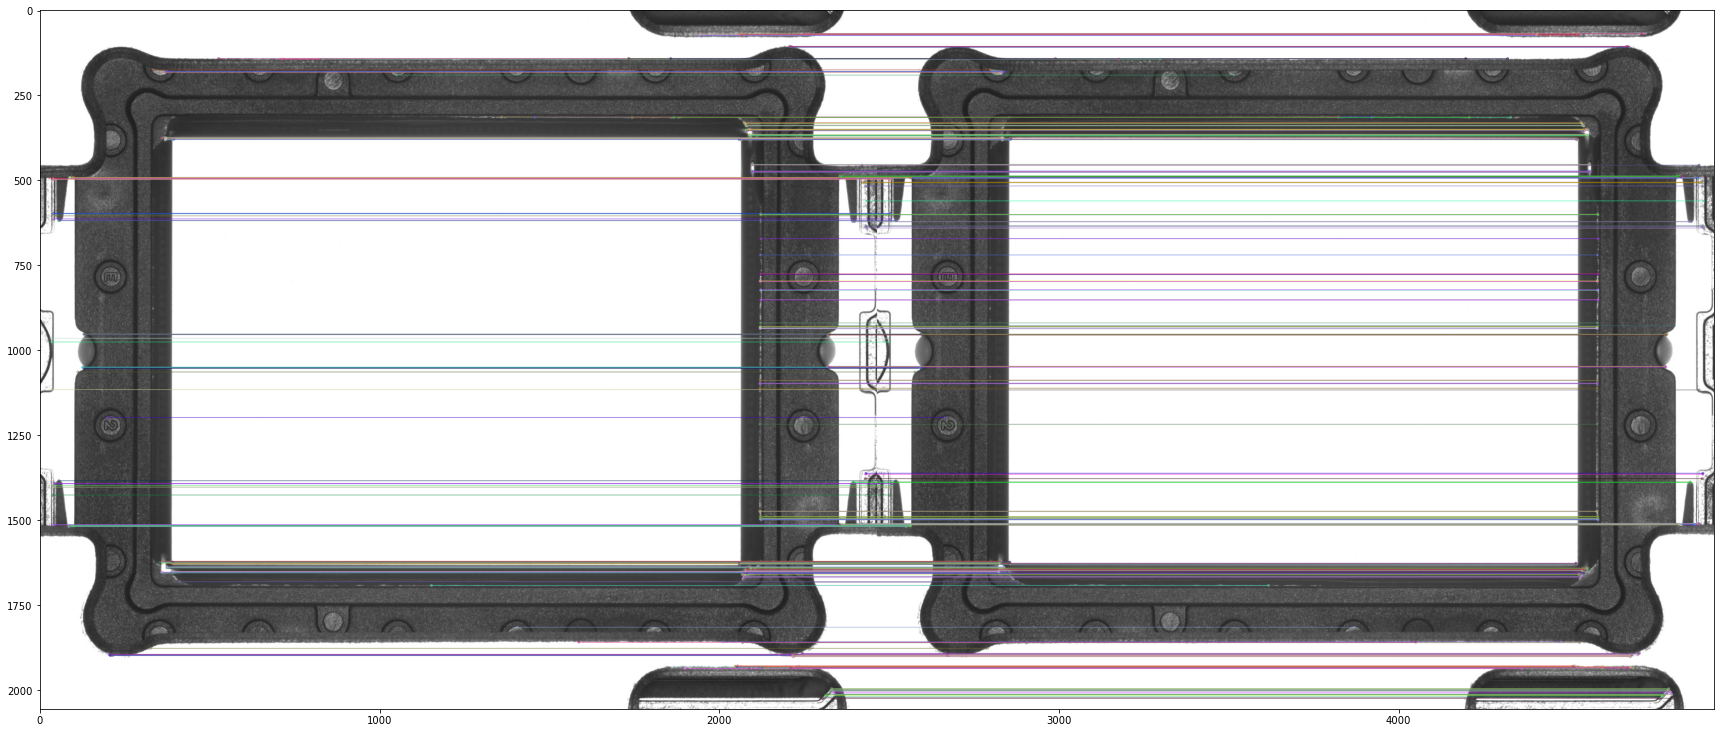

Similarity: 1.00000


In [169]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim

class compareimg:
    def __init__(self):
        pass
    
    def readimg(self, filepath):
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        
        return img
    
    def diffimg(self, img1, img2):
        orb = cv2.ORB_create()
        
        kp1, des1 = orb.detectAndCompute(img1, None)
        kp2, des2 = orb.detectAndCompute(img2, None)
        
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        
        matches = bf.match(des1, des2)
        
        matches = sorted(matches, key = lambda x:x.distance)
        
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)
        
        good = []
        for m,n in matches:
            if m.distance < 0.85 * n.distance:
                good.append([m])
        
        knn_image = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
        plt.figure(figsize=(30,25))
        plt.imshow(knn_image)
        plt.show()
        return knn_image
    
    def run(self):
        filepath1 = './first.jpg'
        filepath2 = './first.jpg'
        
        img1 = self.readimg(filepath1)
        img2 = self.readimg(filepath2)
        
        self.diffimg(img1, img2)
        return img1, img2
        
if __name__ == '__main__':
    clmg = compareimg()
    img1, img2 = clmg.run()

    
    (score, diff) = compare_ssim(img1, img2, full=True)
    diff = (diff*255).astype("uint8")

    print(f"Similarity: {score:.5f}")

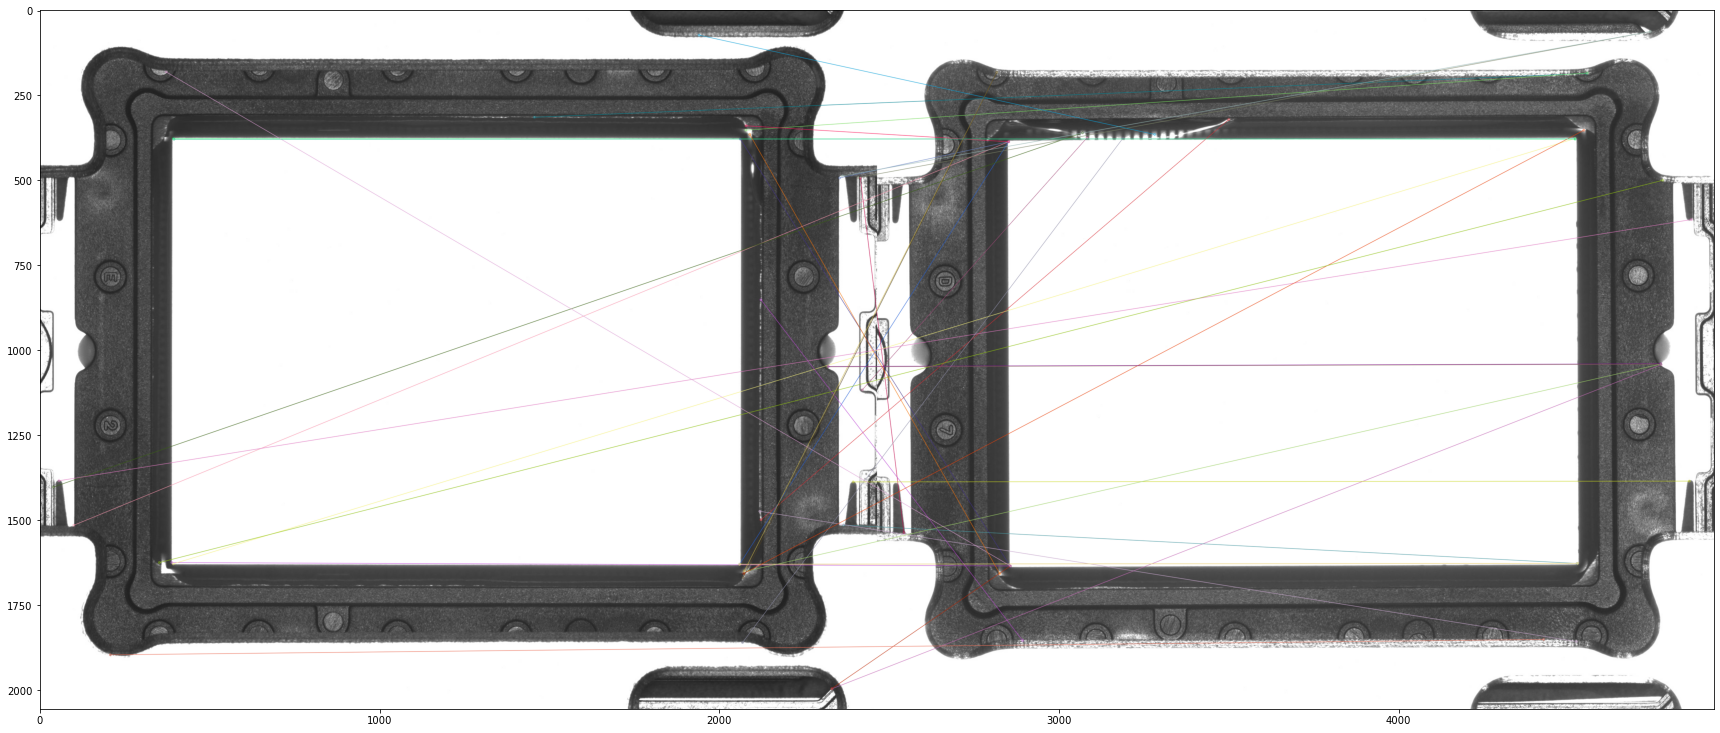

In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class compareimg:
    def __init__(self):
        pass
    
    def readimg(self, filepath):
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        
        return img
    
    def diffimg(self, img1, img2):
        orb = cv2.ORB_create()
        
        kp1, des1 = orb.detectAndCompute(img1, None)
        kp2, des2 = orb.detectAndCompute(img2, None)
        
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        
        matches = bf.match(des1, des2)
        
        matches = sorted(matches, key = lambda x:x.distance)
        
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)
        
        good = []
        for m,n in matches:
            if m.distance < 0.85 * n.distance:
                good.append([m])
        
        knn_image = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
        plt.figure(figsize=(30,25))
        plt.imshow(knn_image)
        plt.show()
        return knn_image
    
    def run(self):
        filepath1 = './first.jpg'
        filepath2 = './second.jpg'
        
        img1 = self.readimg(filepath1)
        img2 = self.readimg(filepath2)
        
        self.diffimg(img1, img2)
        
if __name__ == '__main__':
    clmg = compareimg()
    clmg.run()

(2056, 2464)

## 이미지 특성 매칭하기
##### https://m.blog.naver.com/samsjang/220657424078

In [107]:
import numpy as np
import cv2

def featureMatching():
    img1 = cv2.imread('./first.jpg', cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread('./second.jpg', cv2.IMREAD_GRAYSCALE)
    res = None
    
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    
    matches = sorted(matches, key=lambda x:x.distance)
    res = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], res, flags=0)
    
    cv2.imshow('Feature Matching', res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [111]:
# pip install opencv-contrib-python

In [110]:
# featureMatching()

## 배경 제거
##### https://bkshin.tistory.com/entry/OpenCV-30-%EB%B0%B0%EA%B2%BD-%EC%A0%9C%EA%B1%B0Background-Subtraction